# ***Multi-agent architectures***

LangGraph enables sophisticated multi-agent architectures by representing agents as nodes in a graph, with edges defining communication pathways and control flow. This approach supports dynamic collaboration, task specialization, and state management across agents. Below are the core architectural patterns and implementation details:

### Key Benefits of Multi-Agent Architectures

| **Benefit**           | **Description**                                                                 |
|-----------------------|---------------------------------------------------------------------------------|
| Modularity            | Easier to develop, maintain, and extend each part of the system                |
| Specialization        | Assigns tasks to the most suitable agent for better performance                |
| Scalability           | Add/remove agents as needed for changing workloads                             |
| Workflow Handling     | Manages complex, multi-step, and interdependent processes                      |
| Collaboration         | Enables agents to work together, sharing knowledge and responsibilities        |
| Security              | Limits agent access, reducing risk of data leaks or unauthorized actions       |
| State Management      | Maintains context and supports error recovery across the workflow              |
| Human-in-the-Loop     | Facilitates moderation, approval, and oversight for critical decisions         |


---

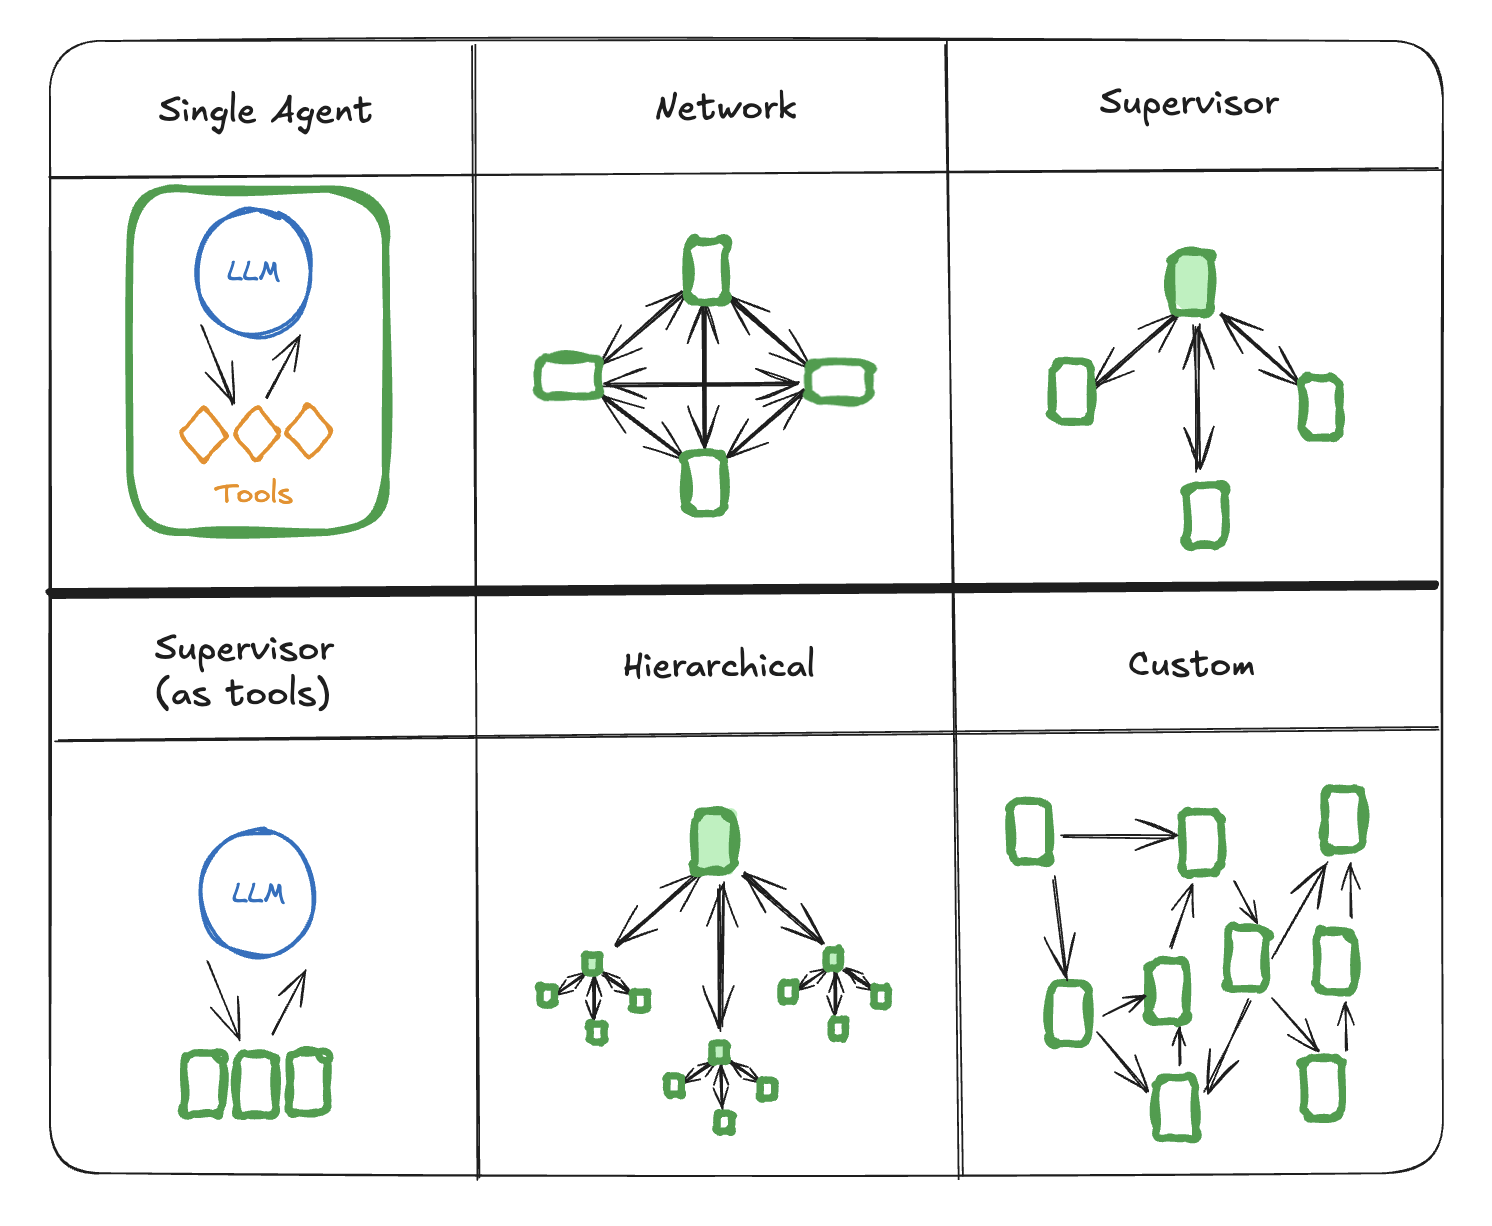

In [2]:
from IPython.display import Image, display
display(Image(filename=r'C:\Users\kanha\Desktop\GenAI\Langraph_1\multi_agent_arch\architectures.png'))

## ***TYPES***

### 🔄 Handoff-Based Architecture
- Agents transfer control using Command objects, specifying:
    - Destination: Next agent/node to activate
    - Payload: State updates for context transfer

Example implementation:

``` python 
def agent(state) -> Command[Literal["next_agent"]]:
    return Command(
        goto="next_agent",
        update={"new_data": "value"}
    )


This pattern enables conditional routing (e.g., based on LLM decisions) and state persistence during transitions

---

### 🏗️ Hierarchical Architectures

Three dominant patterns emerge:

***1. Supervised Teams***

- Supervisor agent delegates tasks to specialized workers (e.g., research, coding, review)
- Implements quality control through escalation paths

***2. Collaborative Peers***
- Agents interact directly via shared tools/memory
- Enables parallel task processing (e.g., simultaneous research and coding

***3. Nested Subgraphs***

- Agents themselves contain subgraphs (e.g., alice and bob as parent nodes)
- Sub-agents navigate between parent-level agents using Command(graph=Command.PARENT)

## ***🧠 Subgraphs in LangGrap***

🔍 Core Concept
A subgraph is a self-contained graph (nodes, edges, state) acting as a single node in a parent graph. It enables:
- Hierarchical organization — Break complex workflows into units
- State isolation — Independent subgraph logic; shared via state keys 
- Encapsulation — Parent graphs remain unaware of subgraph internals



### ⚙️ Integration Methods

| **Method**           | **Use Case**                                 | **Example**                                                                 |
|----------------------|----------------------------------------------|------------------------------------------------------------------------------|
| **State Subgraph**   | Seamless state/key sharing                   | Merges subgraph nodes into parent; uses `SubGraphNode.formatId()` for node tracking. |
| **Compiled Subgraph**| Shared state keys without full merging       | Parent and subgraph share ≥1 state key; extra keys are ignored.             |
| **Node Action**      | Different state schemas requiring transformation | Uses wrapper functions to map state between parent/subgraph.               |

### Key Benefits
- Multi-Agent Systems

        - Subgraphs enable agent teams to operate as cohesive units

- Code Reusability

        - Common workflows (e.g., search processing) become reusable components

- Team Collaboration
    - Subgraphs allow independent development:
        - Teams design subgraphs adhering to interface contracts (input/output schemas).
        - Parent graphs integrate subgraphs without internal implementation knowledge

### 🌐 Communication Mechanics

- State Passing: Parent and subgraph communicate through overlapping state keys (e.g., messages or search_results).

- Command Routing: Subgraphs use Command(graph=Command.PARENT) to navigate between agents at the parent level.

- Error Containment: Failures in subgraphs are isolated without crashing parent workflows

### Constraints
- State Schema Alignment: Compiled subgraphs require ≥1 shared state key with parent.

- Node Renaming: State subgraphs merge nodes using formatId() to avoid naming collisions

>> Subgraphs transform monolithic workflows into modular, scalable architectures by promoting encapsulation, reuse, and team autonomy. This pattern is particularly vital for complex multi-agent systems where tasks require specialized processing and coordination